In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

### 1: Data extraction
Extract optoLARG mean levels from csv file (Lucien Hinderling).


In [2]:
# Import dataset and visualise relevant columns
data_dir = os.path.join("../Data")
path_to_df = os.path.join(data_dir, "focal_adhesions_opto_larg_recruitment.csv")
df = pd.read_csv(path_to_df)
df.columns

Index(['label', 'x', 'y', 'pax', 'optoLARG', 'label_cell', 'dist', 'exp',
       'frame', 'cell_type', 'type', 'roi_id', 'fov', 'pax_cell',
       'optoLARG_cell', 'optoLARG_norm', 'optoLARG_ratio_norm', 'pax_norm',
       'pax_ratio_norm'],
      dtype='object')

In [10]:
# Extract the mean optoLARG activity across all frames and subtract a linear trend (steady-state at 0)
mean_optoLARG_per_frame = df[(df['cell_type']=='WT')].groupby('frame')['optoLARG_ratio_norm'].mean() - 1
slope = (np.mean(mean_optoLARG_per_frame[-3:]) - np.mean(mean_optoLARG_per_frame[0:3])) / (len(mean_optoLARG_per_frame) - 1)
corrected_optoLARG_dynamics = mean_optoLARG_per_frame - np.arange(len(mean_optoLARG_per_frame)) * slope

### 2: Plotting

<Axes: xlabel='frame'>

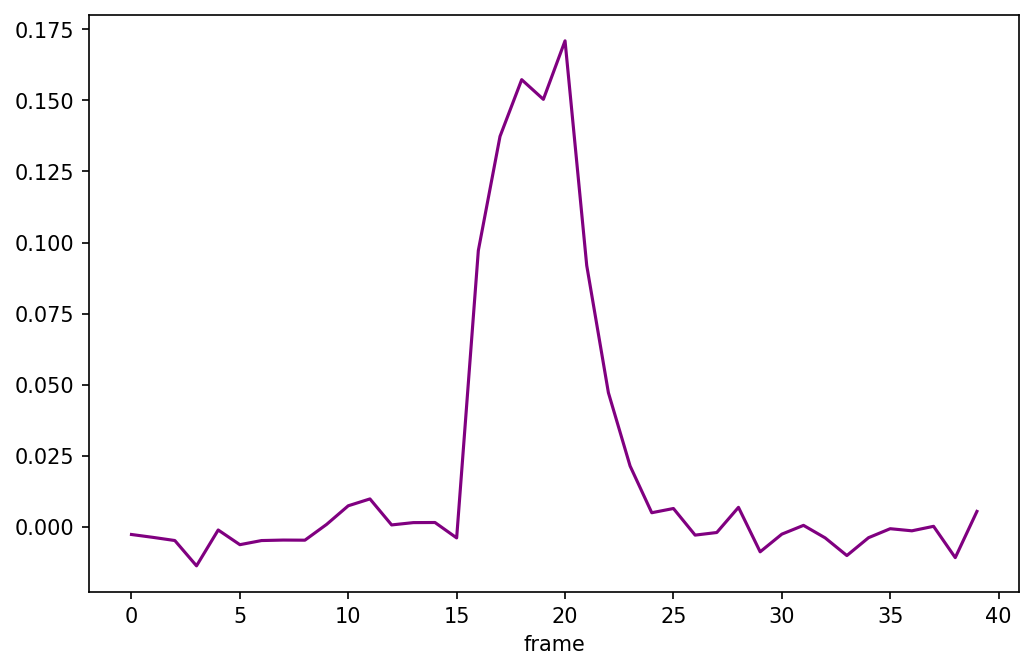

In [11]:
# Plot the data
plt.figure(dpi = 150, figsize = (8,5))
corrected_optoLARG_dynamics.plot(c = 'purple')

### 3: Julia-compatible Export
Export to txt file for compatibility reasons with Julia.

In [14]:
# Export to txt files to import with Julia
corrected_optoLARG_dynamics.to_csv("../Data/mean_optolarg_dynamics.txt", index=False, header=False)